In [159]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from sklearn.metrics import classification_report
from tensorflow.keras import regularizers

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
X = np.load('/content/drive/MyDrive/Data/images.npy')
y = np.load('/content/drive/MyDrive/Data/labels.npy')

0


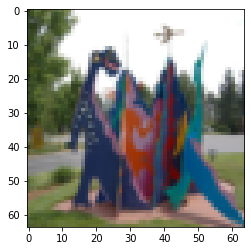

In [162]:
i = 201
plt.imshow(X[i])
print(y[i])

In [163]:
X.shape

(259, 64, 64, 3)

In [164]:
y.shape

(259,)

In [165]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5)

In [166]:
X_train_r = X_train.reshape(X_train.shape[0],-1)
X_val_r = X_val.reshape(X_val.shape[0],-1)
X_test_r = X_test.reshape(X_test.shape[0],-1)

In [167]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_r)
X_train_scaled = scaler.transform(X_train_r)
X_val_scaled = scaler.transform(X_val_r)
X_test_scaled = scaler.transform(X_test_r)

In [168]:
model = Sequential()
model.add(Dense(1,activation='sigmoid'))

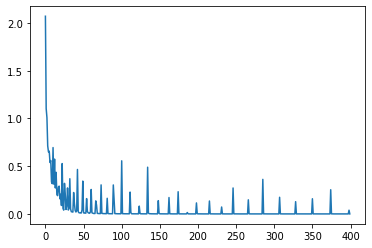

In [169]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=400,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [170]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)
predictions_train = model.predict_classes(X_train_scaled)
print(classification_report(y_train,predictions_train))
predictions_val = model.predict_classes(X_val_scaled)
print(classification_report(y_val,predictions_val))
predictions_test = model.predict_classes(X_test_scaled)
print(classification_report(y_test,predictions_test))

1/1 [==============================] - 0s 19ms/step - loss: 4.8167 - accuracy: 0.4615
[0.00014906609430909157, 1.0] [3.770681142807007, 0.7307692170143127] [4.816727161407471, 0.4615384638309479]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        79

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.78      0.58      0.67        12

    accuracy                           0.73        26
   macro avg       0.74      0.72      0.72        26
weighted avg       0.74      0.73      0.72        26



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.40      0.33      0.36        12
           1       0.50      0.57      0.53        14

    accuracy                           0.46        26
   macro avg       0.45      0.45      0.45        26
weighted avg       0.45      0.46      0.46        26



In [171]:
model = Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

1/1 [==============================] - 0s 17ms/step - loss: 8.0777 - accuracy: 0.5769
[0.06490377336740494, 0.9758453965187073] [4.463951587677002, 0.7307692170143127] [8.077717781066895, 0.5769230723381042]


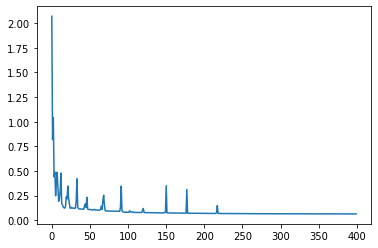

In [172]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=400,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)

In [173]:
model = Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

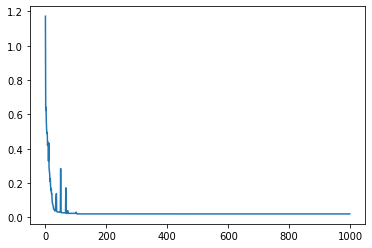

In [174]:
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=1000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [175]:
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)

1/1 [==============================] - 0s 23ms/step - loss: 4.9512 - accuracy: 0.6154
[0.020091282203793526, 0.9855072498321533] [5.107283592224121, 0.5769230723381042] [4.951236248016357, 0.6153846383094788]


1/1 [==============================] - 0s 20ms/step - loss: 1.6901 - accuracy: 0.5769
[0.21231624484062195, 0.9855072498321533] [1.1797986030578613, 0.692307710647583] [1.690109372138977, 0.5769230723381042]


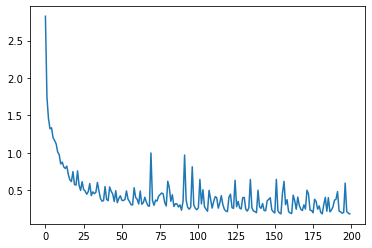

In [176]:
la = 0.02
model = Sequential()
model.add(Dense(20,activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(4,activation='relu',kernel_regularizer=regularizers.l2(la)))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(la)))
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=200,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)
J_train = model.evaluate(X_train_scaled,y_train)
J_val = model.evaluate(X_val_scaled,y_val)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_val,J_test)